In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def loadData(path):
      
    train = []
    train_label = []
    test = []
    test_label = []
    
    print("location of training files : ")
    file = 'data_batch_'
    for i in range(5):                                  #reading all training data
        temp = path + '/' + file + str(i+1)
        with open(temp, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
            train.append(dict[b'data'])
            train_label.append(dict[b'labels'])
            print(str(i+1),"  ->  ",temp)
    
    with open(path + '/' + "test_batch", 'rb') as fo:  #reading all test data
        dict = pickle.load(fo, encoding='bytes')
        test.append(dict[b'data'])
        test_label.append(dict[b'labels'])
        print("\n\ntest file  ->  ",path + '/' + "test_batch")
     
    train_data = np.array(train)                              #converted list to numpy array
    train_label = np.array(train_label)
    test_data = np.array(test)
    test_label = np.array(test_label)
    
    dictData = {}                                       #final token having train and test data of shape(x,3072)
    
    dictData['train_data'] = np.reshape(train_data, newshape = (train_data.shape[0]*train_data.shape[1],train_data.shape[2]))
    dictData['train_label'] = np.reshape(train_label, newshape = (train_label.shape[0]*train_label.shape[1]))
    dictData['test_data'] = np.reshape(test_data, newshape = (test_data.shape[0]*test_data.shape[1],test_data.shape[2]))
    dictData['test_label'] = np.reshape(test_label, newshape = (test_label.shape[0]*test_label.shape[1]))
    return dictData

In [3]:
 #load dataset
dataset = loadData(path="C:\\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py")

location of training files : 
1   ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/data_batch_1
2   ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/data_batch_2
3   ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/data_batch_3
4   ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/data_batch_4
5   ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/data_batch_5


test file  ->   C:\Users\Wahid\OneDrive\Documents\Cifar-10-batches-py/test_batch


In [4]:
dataset['train_data'].shape[0]

50000

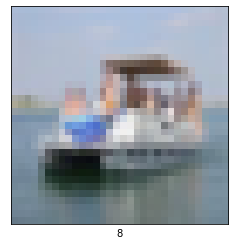

In [5]:
#visualizing train sample
temp = dataset['train_data'][49000]
label = dataset['train_label'][49000]

#representing RGB values
R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))  
plt.imshow(temp)
plt.xticks([])
plt.yticks([])
plt.xlabel(label)
plt.show()

In [6]:
X_train = dataset['train_data'][0:15000]
y_train = dataset['train_label'][0:15000]
X_train.shape


(15000, 3072)

In [7]:
#classifier:
class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
       
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance 
        for i in range(test_samples):
            print("Test example = ",i,end="\n")
            
            
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)  
            
           
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #iterates over min_ind 
            #Max value at any index returned using np.argmax()
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred

In [8]:
num_folds = 5
num_training = 15000

k_choices = [1,2,3,4,5,6,7,8,9,10,11]

if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

In [9]:
# Split training set
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

In [10]:
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

In [11]:
# Perform k-fold cross validation to find the best value of k
for k in range(1,12):
    k_to_accuracies[k] = []

In [12]:
for idx in range(num_folds):
    # Using bin with index idx as validation set
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]

    # Train kNN
    knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set)
 
    
    for k in k_choices:
        # Predict labels for validation set
        y_validation_pred = knn.predict(X_validation_set,k)
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)  # Check accuracy
        k_to_accuracies[k].append(accuracy)

Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Tes

Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467


Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879


Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example 

Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example 

Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example 

Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example 

Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example 

Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250


Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661


Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example 

Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example 

Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example 

Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example 

Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example 

Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
T

Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445


Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857


Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example 

Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example 

Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example 

Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example 

Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example 

Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230


Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642


Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example 

Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example 

Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example 

Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example 

Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example 

Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test exam

Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429


Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841


Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example 

Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example 

Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example 

Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example 

Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example 

Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216


Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626


Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Tes

Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example 

Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example 

Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example 

Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example 

Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example 

Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413


Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825


Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example 

Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example 

Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example 

Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example 

Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example 

Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198


Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608


Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
T

Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example 

Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example 

Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example 

Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example 

Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example 

Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392


Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804


Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example 

Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example 

Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example 

Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example 

Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example 

Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176


Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587


Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998


Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example 

Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example 

Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example 

Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example 

Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example 

Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373


Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784


Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example 

Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example 

Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example 

Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example 

Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example 

Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160


Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571


Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981


Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example 

Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example 

Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example 

Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example 

Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example 

Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353


Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765


Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example 

Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example 

Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example 

Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example 

Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example 

Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test exa

Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554


Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965


Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example 

Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example 

Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example 

Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example 

Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example 

Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339


Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749


Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example 

Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example 

Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example 

Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example 

Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example 

Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test exam

Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534


Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945


Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example 

Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example 

Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example 

Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example 

Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example 

Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322


Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732


Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example 

Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example 

Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example 

Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example 

Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example 

Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test ex

Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515


Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926


Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example 

Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example 

Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example 

Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example 

Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example 

Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299


Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710


Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example 

Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example 

Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example 

Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example 

Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example 

Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example

Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493


Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905


Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example 

Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example 

Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example 

Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example 

Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example 

Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282


Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693


Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example 

Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example 

Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example 

Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example 

Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example 

Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example

Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474


Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884


Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example 

Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example 

Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example 

Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example 

Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example 

Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255


Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665


Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example 

Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example 

Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example 

Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example 

Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example 

Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test exampl

Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451


Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862


Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example 

Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example 

Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example 

Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example 

Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example 

Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235


Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646


Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example 

Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example 

Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example 

Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example 

Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example 

Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test exampl

Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431


Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842


Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example 

Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example 

Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example 

Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example 

Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example 

Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213


Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624


Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test 

Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example 

Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example 

Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example 

Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example 

Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example 

Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412


Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823


Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example 

Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example 

Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example 

Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example 

Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example 

Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198


Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608


Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Te

Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example 

Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example 

Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example 

Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example 

Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example 

Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389


Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801


Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example 

Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example 

Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example 

Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example 

Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example 

Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177


Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587


Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998


Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example 

Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example 

Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example 

Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example 

Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example 

Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373


Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785


Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example 

Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example 

Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example 

Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example 

Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example 

Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161


Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571


Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982


Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example 

Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example 

Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example 

Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example 

Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example 

Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355


Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766


Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example 

Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example 

Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example 

Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example 

Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example 

Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test exam

Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551


Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962


Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example 

Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example 

Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example 

Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example 

Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example 

Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336


Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746


Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example 

Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example 

Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example 

Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example 

Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example 

Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example =  94
Test example =  95
Test example =  96
Test example =  97
Test example =  98
Test example =  99
Test example =  100
Test example =  101
Test example =  102
Test example =  103
Test example =  104
Test example =  105
Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =

Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505
Test example =  506
Test example =  507
Test example =  508
Test example =  509
Test example =  510
Test example =  511
Test example =  512
Test example =  513
Test example =  514
Test example =  515
Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529


Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916
Test example =  917
Test example =  918
Test example =  919
Test example =  920
Test example =  921
Test example =  922
Test example =  923
Test example =  924
Test example =  925
Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939


Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example =  1311
Test example =  1312
Test example =  1313
Test example =  1314
Test example =  1315
Test example =  1316
Test example =  1317
Test example =  1318
Test example =  1319
Test example =  1320
Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example 

Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example =  1704
Test example =  1705
Test example =  1706
Test example =  1707
Test example =  1708
Test example =  1709
Test example =  1710
Test example =  1711
Test example =  1712
Test example =  1713
Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example 

Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example =  2097
Test example =  2098
Test example =  2099
Test example =  2100
Test example =  2101
Test example =  2102
Test example =  2103
Test example =  2104
Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example 

Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example =  2488
Test example =  2489
Test example =  2490
Test example =  2491
Test example =  2492
Test example =  2493
Test example =  2494
Test example =  2495
Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example 

Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example =  2880
Test example =  2881
Test example =  2882
Test example =  2883
Test example =  2884
Test example =  2885
Test example =  2886
Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example 

Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290
Test example =  291
Test example =  292
Test example =  293
Test example =  294
Test example =  295
Test example =  296
Test example =  297
Test example =  298
Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312


Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702
Test example =  703
Test example =  704
Test example =  705
Test example =  706
Test example =  707
Test example =  708
Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723


Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example =  1108
Test example =  1109
Test example =  1110
Test example =  1111
Test example =  1112
Test example =  1113
Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example 

Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example =  1501
Test example =  1502
Test example =  1503
Test example =  1504
Test example =  1505
Test example =  1506
Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example 

Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example =  1894
Test example =  1895
Test example =  1896
Test example =  1897
Test example =  1898
Test example =  1899
Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example 

Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example =  2286
Test example =  2287
Test example =  2288
Test example =  2289
Test example =  2290
Test example =  2291
Test example =  2292
Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example 

Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example =  2677
Test example =  2678
Test example =  2679
Test example =  2680
Test example =  2681
Test example =  2682
Test example =  2683
Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example 

Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example =  75
Test example =  76
Test example =  77
Test example =  78
Test example =  79
Test example =  80
Test example =  81
Test example =  82
Test example =  83
Test example =  84
Test example =  85
Test example =  86
Test example =  87
Test example =  88
Test example =  89
Test example =  90
Test example =  91
Test example =  92
Test example =  93
Test example

Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488
Test example =  489
Test example =  490
Test example =  491
Test example =  492
Test example =  493
Test example =  494
Test example =  495
Test example =  496
Test example =  497
Test example =  498
Test example =  499
Test example =  500
Test example =  501
Test example =  502
Test example =  503
Test example =  504
Test example =  505


Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898
Test example =  899
Test example =  900
Test example =  901
Test example =  902
Test example =  903
Test example =  904
Test example =  905
Test example =  906
Test example =  907
Test example =  908
Test example =  909
Test example =  910
Test example =  911
Test example =  912
Test example =  913
Test example =  914
Test example =  915
Test example =  916


Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example =  1295
Test example =  1296
Test example =  1297
Test example =  1298
Test example =  1299
Test example =  1300
Test example =  1301
Test example =  1302
Test example =  1303
Test example =  1304
Test example =  1305
Test example =  1306
Test example =  1307
Test example =  1308
Test example =  1309
Test example =  1310
Test example 

Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example =  1688
Test example =  1689
Test example =  1690
Test example =  1691
Test example =  1692
Test example =  1693
Test example =  1694
Test example =  1695
Test example =  1696
Test example =  1697
Test example =  1698
Test example =  1699
Test example =  1700
Test example =  1701
Test example =  1702
Test example =  1703
Test example 

Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example =  2079
Test example =  2080
Test example =  2081
Test example =  2082
Test example =  2083
Test example =  2084
Test example =  2085
Test example =  2086
Test example =  2087
Test example =  2088
Test example =  2089
Test example =  2090
Test example =  2091
Test example =  2092
Test example =  2093
Test example =  2094
Test example =  2095
Test example =  2096
Test example 

Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example =  2470
Test example =  2471
Test example =  2472
Test example =  2473
Test example =  2474
Test example =  2475
Test example =  2476
Test example =  2477
Test example =  2478
Test example =  2479
Test example =  2480
Test example =  2481
Test example =  2482
Test example =  2483
Test example =  2484
Test example =  2485
Test example =  2486
Test example =  2487
Test example 

Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example =  2861
Test example =  2862
Test example =  2863
Test example =  2864
Test example =  2865
Test example =  2866
Test example =  2867
Test example =  2868
Test example =  2869
Test example =  2870
Test example =  2871
Test example =  2872
Test example =  2873
Test example =  2874
Test example =  2875
Test example =  2876
Test example =  2877
Test example =  2878
Test example =  2879
Test example 

Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271
Test example =  272
Test example =  273
Test example =  274
Test example =  275
Test example =  276
Test example =  277
Test example =  278
Test example =  279
Test example =  280
Test example =  281
Test example =  282
Test example =  283
Test example =  284
Test example =  285
Test example =  286
Test example =  287
Test example =  288
Test example =  289
Test example =  290


Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682
Test example =  683
Test example =  684
Test example =  685
Test example =  686
Test example =  687
Test example =  688
Test example =  689
Test example =  690
Test example =  691
Test example =  692
Test example =  693
Test example =  694
Test example =  695
Test example =  696
Test example =  697
Test example =  698
Test example =  699
Test example =  700
Test example =  701
Test example =  702


Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example =  1089
Test example =  1090
Test example =  1091
Test example =  1092
Test example =  1093
Test example =  1094
Test example =  1095
Test example =  1096
Test example =  1097
Test example =  1098
Test example =  1099
Test example =  1100
Test example =  1101
Test example =  1102
Test example =  1103
Test example =  1104
Test example =  1105
Test example =  1106
Test example =  1107
Test example 

Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example =  1482
Test example =  1483
Test example =  1484
Test example =  1485
Test example =  1486
Test example =  1487
Test example =  1488
Test example =  1489
Test example =  1490
Test example =  1491
Test example =  1492
Test example =  1493
Test example =  1494
Test example =  1495
Test example =  1496
Test example =  1497
Test example =  1498
Test example =  1499
Test example =  1500
Test example 

Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example =  1873
Test example =  1874
Test example =  1875
Test example =  1876
Test example =  1877
Test example =  1878
Test example =  1879
Test example =  1880
Test example =  1881
Test example =  1882
Test example =  1883
Test example =  1884
Test example =  1885
Test example =  1886
Test example =  1887
Test example =  1888
Test example =  1889
Test example =  1890
Test example =  1891
Test example =  1892
Test example =  1893
Test example 

Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example =  2266
Test example =  2267
Test example =  2268
Test example =  2269
Test example =  2270
Test example =  2271
Test example =  2272
Test example =  2273
Test example =  2274
Test example =  2275
Test example =  2276
Test example =  2277
Test example =  2278
Test example =  2279
Test example =  2280
Test example =  2281
Test example =  2282
Test example =  2283
Test example =  2284
Test example =  2285
Test example 

Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example =  2658
Test example =  2659
Test example =  2660
Test example =  2661
Test example =  2662
Test example =  2663
Test example =  2664
Test example =  2665
Test example =  2666
Test example =  2667
Test example =  2668
Test example =  2669
Test example =  2670
Test example =  2671
Test example =  2672
Test example =  2673
Test example =  2674
Test example =  2675
Test example =  2676
Test example 

Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56
Test example =  57
Test example =  58
Test example =  59
Test example =  60
Test example =  61
Test example =  62
Test example =  63
Test example =  64
Test example =  65
Test example =  66
Test example =  67
Test example =  68
Test example =  69
Test example =  70
Test example =  71
Test example =  72
Test example =  73
Test example =  74
Test example

Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468
Test example =  469
Test example =  470
Test example =  471
Test example =  472
Test example =  473
Test example =  474
Test example =  475
Test example =  476
Test example =  477
Test example =  478
Test example =  479
Test example =  480
Test example =  481
Test example =  482
Test example =  483
Test example =  484
Test example =  485
Test example =  486
Test example =  487
Test example =  488


Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878
Test example =  879
Test example =  880
Test example =  881
Test example =  882
Test example =  883
Test example =  884
Test example =  885
Test example =  886
Test example =  887
Test example =  888
Test example =  889
Test example =  890
Test example =  891
Test example =  892
Test example =  893
Test example =  894
Test example =  895
Test example =  896
Test example =  897
Test example =  898


Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example =  1275
Test example =  1276
Test example =  1277
Test example =  1278
Test example =  1279
Test example =  1280
Test example =  1281
Test example =  1282
Test example =  1283
Test example =  1284
Test example =  1285
Test example =  1286
Test example =  1287
Test example =  1288
Test example =  1289
Test example =  1290
Test example =  1291
Test example =  1292
Test example =  1293
Test example =  1294
Test example 

Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example =  1666
Test example =  1667
Test example =  1668
Test example =  1669
Test example =  1670
Test example =  1671
Test example =  1672
Test example =  1673
Test example =  1674
Test example =  1675
Test example =  1676
Test example =  1677
Test example =  1678
Test example =  1679
Test example =  1680
Test example =  1681
Test example =  1682
Test example =  1683
Test example =  1684
Test example =  1685
Test example =  1686
Test example =  1687
Test example 

Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example =  2059
Test example =  2060
Test example =  2061
Test example =  2062
Test example =  2063
Test example =  2064
Test example =  2065
Test example =  2066
Test example =  2067
Test example =  2068
Test example =  2069
Test example =  2070
Test example =  2071
Test example =  2072
Test example =  2073
Test example =  2074
Test example =  2075
Test example =  2076
Test example =  2077
Test example =  2078
Test example 

Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example =  2452
Test example =  2453
Test example =  2454
Test example =  2455
Test example =  2456
Test example =  2457
Test example =  2458
Test example =  2459
Test example =  2460
Test example =  2461
Test example =  2462
Test example =  2463
Test example =  2464
Test example =  2465
Test example =  2466
Test example =  2467
Test example =  2468
Test example =  2469
Test example 

Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example =  2845
Test example =  2846
Test example =  2847
Test example =  2848
Test example =  2849
Test example =  2850
Test example =  2851
Test example =  2852
Test example =  2853
Test example =  2854
Test example =  2855
Test example =  2856
Test example =  2857
Test example =  2858
Test example =  2859
Test example =  2860
Test example 

Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255
Test example =  256
Test example =  257
Test example =  258
Test example =  259
Test example =  260
Test example =  261
Test example =  262
Test example =  263
Test example =  264
Test example =  265
Test example =  266
Test example =  267
Test example =  268
Test example =  269
Test example =  270
Test example =  271


Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667
Test example =  668
Test example =  669
Test example =  670
Test example =  671
Test example =  672
Test example =  673
Test example =  674
Test example =  675
Test example =  676
Test example =  677
Test example =  678
Test example =  679
Test example =  680
Test example =  681
Test example =  682


Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example =  1076
Test example =  1077
Test example =  1078
Test example =  1079
Test example =  1080
Test example =  1081
Test example =  1082
Test example =  1083
Test example =  1084
Test example =  1085
Test example =  1086
Test example =  1087
Test example =  1088
Test example 

Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example =  1468
Test example =  1469
Test example =  1470
Test example =  1471
Test example =  1472
Test example =  1473
Test example =  1474
Test example =  1475
Test example =  1476
Test example =  1477
Test example =  1478
Test example =  1479
Test example =  1480
Test example =  1481
Test example 

Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example =  1861
Test example =  1862
Test example =  1863
Test example =  1864
Test example =  1865
Test example =  1866
Test example =  1867
Test example =  1868
Test example =  1869
Test example =  1870
Test example =  1871
Test example =  1872
Test example 

Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example =  2253
Test example =  2254
Test example =  2255
Test example =  2256
Test example =  2257
Test example =  2258
Test example =  2259
Test example =  2260
Test example =  2261
Test example =  2262
Test example =  2263
Test example =  2264
Test example =  2265
Test example 

Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example =  2644
Test example =  2645
Test example =  2646
Test example =  2647
Test example =  2648
Test example =  2649
Test example =  2650
Test example =  2651
Test example =  2652
Test example =  2653
Test example =  2654
Test example =  2655
Test example =  2656
Test example =  2657
Test example 

Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40
Test example =  41
Test example =  42
Test example =  43
Test example =  44
Test example =  45
Test example =  46
Test example =  47
Test example =  48
Test example =  49
Test example =  50
Test example =  51
Test example =  52
Test example =  53
Test example =  54
Test example =  55
Test example =  56

Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454
Test example =  455
Test example =  456
Test example =  457
Test example =  458
Test example =  459
Test example =  460
Test example =  461
Test example =  462
Test example =  463
Test example =  464
Test example =  465
Test example =  466
Test example =  467
Test example =  468


Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865
Test example =  866
Test example =  867
Test example =  868
Test example =  869
Test example =  870
Test example =  871
Test example =  872
Test example =  873
Test example =  874
Test example =  875
Test example =  876
Test example =  877
Test example =  878


Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example =  1263
Test example =  1264
Test example =  1265
Test example =  1266
Test example =  1267
Test example =  1268
Test example =  1269
Test example =  1270
Test example =  1271
Test example =  1272
Test example =  1273
Test example =  1274
Test example 

Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example =  1656
Test example =  1657
Test example =  1658
Test example =  1659
Test example =  1660
Test example =  1661
Test example =  1662
Test example =  1663
Test example =  1664
Test example =  1665
Test example 

Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example =  2049
Test example =  2050
Test example =  2051
Test example =  2052
Test example =  2053
Test example =  2054
Test example =  2055
Test example =  2056
Test example =  2057
Test example =  2058
Test example 

Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example =  2441
Test example =  2442
Test example =  2443
Test example =  2444
Test example =  2445
Test example =  2446
Test example =  2447
Test example =  2448
Test example =  2449
Test example =  2450
Test example =  2451
Test example 

Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example =  2832
Test example =  2833
Test example =  2834
Test example =  2835
Test example =  2836
Test example =  2837
Test example =  2838
Test example =  2839
Test example =  2840
Test example =  2841
Test example =  2842
Test example =  2843
Test example =  2844
Test example 

Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239
Test example =  240
Test example =  241
Test example =  242
Test example =  243
Test example =  244
Test example =  245
Test example =  246
Test example =  247
Test example =  248
Test example =  249
Test example =  250
Test example =  251
Test example =  252
Test example =  253
Test example =  254
Test example =  255


Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651
Test example =  652
Test example =  653
Test example =  654
Test example =  655
Test example =  656
Test example =  657
Test example =  658
Test example =  659
Test example =  660
Test example =  661
Test example =  662
Test example =  663
Test example =  664
Test example =  665
Test example =  666
Test example =  667


Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example =  1059
Test example =  1060
Test example =  1061
Test example =  1062
Test example =  1063
Test example =  1064
Test example =  1065
Test example =  1066
Test example =  1067
Test example =  1068
Test example =  1069
Test example =  1070
Test example =  1071
Test example =  1072
Test example =  1073
Test example =  1074
Test example =  1075
Test example 

Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example =  1452
Test example =  1453
Test example =  1454
Test example =  1455
Test example =  1456
Test example =  1457
Test example =  1458
Test example =  1459
Test example =  1460
Test example =  1461
Test example =  1462
Test example =  1463
Test example =  1464
Test example =  1465
Test example =  1466
Test example =  1467
Test example 

Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example =  1844
Test example =  1845
Test example =  1846
Test example =  1847
Test example =  1848
Test example =  1849
Test example =  1850
Test example =  1851
Test example =  1852
Test example =  1853
Test example =  1854
Test example =  1855
Test example =  1856
Test example =  1857
Test example =  1858
Test example =  1859
Test example =  1860
Test example 

Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example =  2237
Test example =  2238
Test example =  2239
Test example =  2240
Test example =  2241
Test example =  2242
Test example =  2243
Test example =  2244
Test example =  2245
Test example =  2246
Test example =  2247
Test example =  2248
Test example =  2249
Test example =  2250
Test example =  2251
Test example =  2252
Test example 

Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example =  2629
Test example =  2630
Test example =  2631
Test example =  2632
Test example =  2633
Test example =  2634
Test example =  2635
Test example =  2636
Test example =  2637
Test example =  2638
Test example =  2639
Test example =  2640
Test example =  2641
Test example =  2642
Test example =  2643
Test example 

Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test example =  25
Test example =  26
Test example =  27
Test example =  28
Test example =  29
Test example =  30
Test example =  31
Test example =  32
Test example =  33
Test example =  34
Test example =  35
Test example =  36
Test example =  37
Test example =  38
Test example =  39
Test example =  40


Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439
Test example =  440
Test example =  441
Test example =  442
Test example =  443
Test example =  444
Test example =  445
Test example =  446
Test example =  447
Test example =  448
Test example =  449
Test example =  450
Test example =  451
Test example =  452
Test example =  453
Test example =  454


Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849
Test example =  850
Test example =  851
Test example =  852
Test example =  853
Test example =  854
Test example =  855
Test example =  856
Test example =  857
Test example =  858
Test example =  859
Test example =  860
Test example =  861
Test example =  862
Test example =  863
Test example =  864
Test example =  865


Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example =  1249
Test example =  1250
Test example =  1251
Test example =  1252
Test example =  1253
Test example =  1254
Test example =  1255
Test example =  1256
Test example =  1257
Test example =  1258
Test example =  1259
Test example =  1260
Test example =  1261
Test example =  1262
Test example 

Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example =  1640
Test example =  1641
Test example =  1642
Test example =  1643
Test example =  1644
Test example =  1645
Test example =  1646
Test example =  1647
Test example =  1648
Test example =  1649
Test example =  1650
Test example =  1651
Test example =  1652
Test example =  1653
Test example =  1654
Test example =  1655
Test example 

Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example =  2031
Test example =  2032
Test example =  2033
Test example =  2034
Test example =  2035
Test example =  2036
Test example =  2037
Test example =  2038
Test example =  2039
Test example =  2040
Test example =  2041
Test example =  2042
Test example =  2043
Test example =  2044
Test example =  2045
Test example =  2046
Test example =  2047
Test example =  2048
Test example 

Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example =  2422
Test example =  2423
Test example =  2424
Test example =  2425
Test example =  2426
Test example =  2427
Test example =  2428
Test example =  2429
Test example =  2430
Test example =  2431
Test example =  2432
Test example =  2433
Test example =  2434
Test example =  2435
Test example =  2436
Test example =  2437
Test example =  2438
Test example =  2439
Test example =  2440
Test example 

Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example =  2813
Test example =  2814
Test example =  2815
Test example =  2816
Test example =  2817
Test example =  2818
Test example =  2819
Test example =  2820
Test example =  2821
Test example =  2822
Test example =  2823
Test example =  2824
Test example =  2825
Test example =  2826
Test example =  2827
Test example =  2828
Test example =  2829
Test example =  2830
Test example =  2831
Test example 

Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221
Test example =  222
Test example =  223
Test example =  224
Test example =  225
Test example =  226
Test example =  227
Test example =  228
Test example =  229
Test example =  230
Test example =  231
Test example =  232
Test example =  233
Test example =  234
Test example =  235
Test example =  236
Test example =  237
Test example =  238
Test example =  239


Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632
Test example =  633
Test example =  634
Test example =  635
Test example =  636
Test example =  637
Test example =  638
Test example =  639
Test example =  640
Test example =  641
Test example =  642
Test example =  643
Test example =  644
Test example =  645
Test example =  646
Test example =  647
Test example =  648
Test example =  649
Test example =  650
Test example =  651


Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040
Test example =  1041
Test example =  1042
Test example =  1043
Test example =  1044
Test example =  1045
Test example =  1046
Test example =  1047
Test example =  1048
Test example =  1049
Test example =  1050
Test example =  1051
Test example =  1052
Test example =  1053
Test example =  1054
Test example =  1055
Test example =  1056
Test example =  1057
Test example =  1058
Test example 

Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example =  1432
Test example =  1433
Test example =  1434
Test example =  1435
Test example =  1436
Test example =  1437
Test example =  1438
Test example =  1439
Test example =  1440
Test example =  1441
Test example =  1442
Test example =  1443
Test example =  1444
Test example =  1445
Test example =  1446
Test example =  1447
Test example =  1448
Test example =  1449
Test example =  1450
Test example =  1451
Test example 

Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example =  1823
Test example =  1824
Test example =  1825
Test example =  1826
Test example =  1827
Test example =  1828
Test example =  1829
Test example =  1830
Test example =  1831
Test example =  1832
Test example =  1833
Test example =  1834
Test example =  1835
Test example =  1836
Test example =  1837
Test example =  1838
Test example =  1839
Test example =  1840
Test example =  1841
Test example =  1842
Test example =  1843
Test example 

Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example =  2216
Test example =  2217
Test example =  2218
Test example =  2219
Test example =  2220
Test example =  2221
Test example =  2222
Test example =  2223
Test example =  2224
Test example =  2225
Test example =  2226
Test example =  2227
Test example =  2228
Test example =  2229
Test example =  2230
Test example =  2231
Test example =  2232
Test example =  2233
Test example =  2234
Test example =  2235
Test example =  2236
Test example 

Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example =  2607
Test example =  2608
Test example =  2609
Test example =  2610
Test example =  2611
Test example =  2612
Test example =  2613
Test example =  2614
Test example =  2615
Test example =  2616
Test example =  2617
Test example =  2618
Test example =  2619
Test example =  2620
Test example =  2621
Test example =  2622
Test example =  2623
Test example =  2624
Test example =  2625
Test example =  2626
Test example =  2627
Test example =  2628
Test example 

Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example =  0
Test example =  1
Test example =  2
Test example =  3
Test example =  4
Test example =  5
Test example =  6
Test example =  7
Test example =  8
Test example =  9
Test example =  10
Test example =  11
Test example =  12
Test example =  13
Test example =  14
Test example =  15
Test example =  16
Test example =  17
Test example =  18
Test example =  19
Test example =  20
Test example =  21
Test example =  22
Test example =  23
Test example =  24
Test examp

Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415
Test example =  416
Test example =  417
Test example =  418
Test example =  419
Test example =  420
Test example =  421
Test example =  422
Test example =  423
Test example =  424
Test example =  425
Test example =  426
Test example =  427
Test example =  428
Test example =  429
Test example =  430
Test example =  431
Test example =  432
Test example =  433
Test example =  434
Test example =  435
Test example =  436
Test example =  437
Test example =  438
Test example =  439


Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825
Test example =  826
Test example =  827
Test example =  828
Test example =  829
Test example =  830
Test example =  831
Test example =  832
Test example =  833
Test example =  834
Test example =  835
Test example =  836
Test example =  837
Test example =  838
Test example =  839
Test example =  840
Test example =  841
Test example =  842
Test example =  843
Test example =  844
Test example =  845
Test example =  846
Test example =  847
Test example =  848
Test example =  849


Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example =  1226
Test example =  1227
Test example =  1228
Test example =  1229
Test example =  1230
Test example =  1231
Test example =  1232
Test example =  1233
Test example =  1234
Test example =  1235
Test example =  1236
Test example =  1237
Test example =  1238
Test example =  1239
Test example =  1240
Test example =  1241
Test example =  1242
Test example =  1243
Test example =  1244
Test example =  1245
Test example =  1246
Test example =  1247
Test example =  1248
Test example 

Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example =  1619
Test example =  1620
Test example =  1621
Test example =  1622
Test example =  1623
Test example =  1624
Test example =  1625
Test example =  1626
Test example =  1627
Test example =  1628
Test example =  1629
Test example =  1630
Test example =  1631
Test example =  1632
Test example =  1633
Test example =  1634
Test example =  1635
Test example =  1636
Test example =  1637
Test example =  1638
Test example =  1639
Test example 

Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example =  2011
Test example =  2012
Test example =  2013
Test example =  2014
Test example =  2015
Test example =  2016
Test example =  2017
Test example =  2018
Test example =  2019
Test example =  2020
Test example =  2021
Test example =  2022
Test example =  2023
Test example =  2024
Test example =  2025
Test example =  2026
Test example =  2027
Test example =  2028
Test example =  2029
Test example =  2030
Test example 

Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example =  2403
Test example =  2404
Test example =  2405
Test example =  2406
Test example =  2407
Test example =  2408
Test example =  2409
Test example =  2410
Test example =  2411
Test example =  2412
Test example =  2413
Test example =  2414
Test example =  2415
Test example =  2416
Test example =  2417
Test example =  2418
Test example =  2419
Test example =  2420
Test example =  2421
Test example 

Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example =  2794
Test example =  2795
Test example =  2796
Test example =  2797
Test example =  2798
Test example =  2799
Test example =  2800
Test example =  2801
Test example =  2802
Test example =  2803
Test example =  2804
Test example =  2805
Test example =  2806
Test example =  2807
Test example =  2808
Test example =  2809
Test example =  2810
Test example =  2811
Test example =  2812
Test example 

Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200
Test example =  201
Test example =  202
Test example =  203
Test example =  204
Test example =  205
Test example =  206
Test example =  207
Test example =  208
Test example =  209
Test example =  210
Test example =  211
Test example =  212
Test example =  213
Test example =  214
Test example =  215
Test example =  216
Test example =  217
Test example =  218
Test example =  219
Test example =  220
Test example =  221


Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612
Test example =  613
Test example =  614
Test example =  615
Test example =  616
Test example =  617
Test example =  618
Test example =  619
Test example =  620
Test example =  621
Test example =  622
Test example =  623
Test example =  624
Test example =  625
Test example =  626
Test example =  627
Test example =  628
Test example =  629
Test example =  630
Test example =  631
Test example =  632


Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  1022
Test example =  1023
Test example =  1024
Test example =  1025
Test example =  1026
Test example =  1027
Test example =  1028
Test example =  1029
Test example =  1030
Test example =  1031
Test example =  1032
Test example =  1033
Test example =  1034
Test example =  1035
Test example =  1036
Test example =  1037
Test example =  1038
Test example =  1039
Test example =  1040

Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example =  1414
Test example =  1415
Test example =  1416
Test example =  1417
Test example =  1418
Test example =  1419
Test example =  1420
Test example =  1421
Test example =  1422
Test example =  1423
Test example =  1424
Test example =  1425
Test example =  1426
Test example =  1427
Test example =  1428
Test example =  1429
Test example =  1430
Test example =  1431
Test example 

Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example =  1807
Test example =  1808
Test example =  1809
Test example =  1810
Test example =  1811
Test example =  1812
Test example =  1813
Test example =  1814
Test example =  1815
Test example =  1816
Test example =  1817
Test example =  1818
Test example =  1819
Test example =  1820
Test example =  1821
Test example =  1822
Test example 

Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example =  2198
Test example =  2199
Test example =  2200
Test example =  2201
Test example =  2202
Test example =  2203
Test example =  2204
Test example =  2205
Test example =  2206
Test example =  2207
Test example =  2208
Test example =  2209
Test example =  2210
Test example =  2211
Test example =  2212
Test example =  2213
Test example =  2214
Test example =  2215
Test example 

Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example =  2591
Test example =  2592
Test example =  2593
Test example =  2594
Test example =  2595
Test example =  2596
Test example =  2597
Test example =  2598
Test example =  2599
Test example =  2600
Test example =  2601
Test example =  2602
Test example =  2603
Test example =  2604
Test example =  2605
Test example =  2606
Test example 

Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example =  2982
Test example =  2983
Test example =  2984
Test example =  2985
Test example =  2986
Test example =  2987
Test example =  2988
Test example =  2989
Test example =  2990
Test example =  2991
Test example =  2992
Test example =  2993
Test example =  2994
Test example =  2995
Test example =  2996
Test example =  2997
Test example =  2998
Test example =  2999
Test example 

Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396
Test example =  397
Test example =  398
Test example =  399
Test example =  400
Test example =  401
Test example =  402
Test example =  403
Test example =  404
Test example =  405
Test example =  406
Test example =  407
Test example =  408
Test example =  409
Test example =  410
Test example =  411
Test example =  412
Test example =  413
Test example =  414
Test example =  415


Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806
Test example =  807
Test example =  808
Test example =  809
Test example =  810
Test example =  811
Test example =  812
Test example =  813
Test example =  814
Test example =  815
Test example =  816
Test example =  817
Test example =  818
Test example =  819
Test example =  820
Test example =  821
Test example =  822
Test example =  823
Test example =  824
Test example =  825


Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example =  1206
Test example =  1207
Test example =  1208
Test example =  1209
Test example =  1210
Test example =  1211
Test example =  1212
Test example =  1213
Test example =  1214
Test example =  1215
Test example =  1216
Test example =  1217
Test example =  1218
Test example =  1219
Test example =  1220
Test example =  1221
Test example =  1222
Test example =  1223
Test example =  1224
Test example =  1225
Test example 

Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example =  1598
Test example =  1599
Test example =  1600
Test example =  1601
Test example =  1602
Test example =  1603
Test example =  1604
Test example =  1605
Test example =  1606
Test example =  1607
Test example =  1608
Test example =  1609
Test example =  1610
Test example =  1611
Test example =  1612
Test example =  1613
Test example =  1614
Test example =  1615
Test example =  1616
Test example =  1617
Test example =  1618
Test example 

Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example =  1990
Test example =  1991
Test example =  1992
Test example =  1993
Test example =  1994
Test example =  1995
Test example =  1996
Test example =  1997
Test example =  1998
Test example =  1999
Test example =  2000
Test example =  2001
Test example =  2002
Test example =  2003
Test example =  2004
Test example =  2005
Test example =  2006
Test example =  2007
Test example =  2008
Test example =  2009
Test example =  2010
Test example 

Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example =  2381
Test example =  2382
Test example =  2383
Test example =  2384
Test example =  2385
Test example =  2386
Test example =  2387
Test example =  2388
Test example =  2389
Test example =  2390
Test example =  2391
Test example =  2392
Test example =  2393
Test example =  2394
Test example =  2395
Test example =  2396
Test example =  2397
Test example =  2398
Test example =  2399
Test example =  2400
Test example =  2401
Test example =  2402
Test example 

Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example =  2772
Test example =  2773
Test example =  2774
Test example =  2775
Test example =  2776
Test example =  2777
Test example =  2778
Test example =  2779
Test example =  2780
Test example =  2781
Test example =  2782
Test example =  2783
Test example =  2784
Test example =  2785
Test example =  2786
Test example =  2787
Test example =  2788
Test example =  2789
Test example =  2790
Test example =  2791
Test example =  2792
Test example =  2793
Test example 

Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177
Test example =  178
Test example =  179
Test example =  180
Test example =  181
Test example =  182
Test example =  183
Test example =  184
Test example =  185
Test example =  186
Test example =  187
Test example =  188
Test example =  189
Test example =  190
Test example =  191
Test example =  192
Test example =  193
Test example =  194
Test example =  195
Test example =  196
Test example =  197
Test example =  198
Test example =  199
Test example =  200


Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588
Test example =  589
Test example =  590
Test example =  591
Test example =  592
Test example =  593
Test example =  594
Test example =  595
Test example =  596
Test example =  597
Test example =  598
Test example =  599
Test example =  600
Test example =  601
Test example =  602
Test example =  603
Test example =  604
Test example =  605
Test example =  606
Test example =  607
Test example =  608
Test example =  609
Test example =  610
Test example =  611
Test example =  612


Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998
Test example =  999
Test example =  1000
Test example =  1001
Test example =  1002
Test example =  1003
Test example =  1004
Test example =  1005
Test example =  1006
Test example =  1007
Test example =  1008
Test example =  1009
Test example =  1010
Test example =  1011
Test example =  1012
Test example =  1013
Test example =  1014
Test example =  1015
Test example =  1016
Test example =  1017
Test example =  1018
Test example =  1019
Test example =  1020
Test example =  1021
Test example =  10

Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example =  1390
Test example =  1391
Test example =  1392
Test example =  1393
Test example =  1394
Test example =  1395
Test example =  1396
Test example =  1397
Test example =  1398
Test example =  1399
Test example =  1400
Test example =  1401
Test example =  1402
Test example =  1403
Test example =  1404
Test example =  1405
Test example =  1406
Test example =  1407
Test example =  1408
Test example =  1409
Test example =  1410
Test example =  1411
Test example =  1412
Test example =  1413
Test example 

Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example =  1781
Test example =  1782
Test example =  1783
Test example =  1784
Test example =  1785
Test example =  1786
Test example =  1787
Test example =  1788
Test example =  1789
Test example =  1790
Test example =  1791
Test example =  1792
Test example =  1793
Test example =  1794
Test example =  1795
Test example =  1796
Test example =  1797
Test example =  1798
Test example =  1799
Test example =  1800
Test example =  1801
Test example =  1802
Test example =  1803
Test example =  1804
Test example =  1805
Test example =  1806
Test example 

Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example =  2172
Test example =  2173
Test example =  2174
Test example =  2175
Test example =  2176
Test example =  2177
Test example =  2178
Test example =  2179
Test example =  2180
Test example =  2181
Test example =  2182
Test example =  2183
Test example =  2184
Test example =  2185
Test example =  2186
Test example =  2187
Test example =  2188
Test example =  2189
Test example =  2190
Test example =  2191
Test example =  2192
Test example =  2193
Test example =  2194
Test example =  2195
Test example =  2196
Test example =  2197
Test example 

Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example =  2563
Test example =  2564
Test example =  2565
Test example =  2566
Test example =  2567
Test example =  2568
Test example =  2569
Test example =  2570
Test example =  2571
Test example =  2572
Test example =  2573
Test example =  2574
Test example =  2575
Test example =  2576
Test example =  2577
Test example =  2578
Test example =  2579
Test example =  2580
Test example =  2581
Test example =  2582
Test example =  2583
Test example =  2584
Test example =  2585
Test example =  2586
Test example =  2587
Test example =  2588
Test example =  2589
Test example =  2590
Test example 

Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example =  2954
Test example =  2955
Test example =  2956
Test example =  2957
Test example =  2958
Test example =  2959
Test example =  2960
Test example =  2961
Test example =  2962
Test example =  2963
Test example =  2964
Test example =  2965
Test example =  2966
Test example =  2967
Test example =  2968
Test example =  2969
Test example =  2970
Test example =  2971
Test example =  2972
Test example =  2973
Test example =  2974
Test example =  2975
Test example =  2976
Test example =  2977
Test example =  2978
Test example =  2979
Test example =  2980
Test example =  2981
Test example 

Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368
Test example =  369
Test example =  370
Test example =  371
Test example =  372
Test example =  373
Test example =  374
Test example =  375
Test example =  376
Test example =  377
Test example =  378
Test example =  379
Test example =  380
Test example =  381
Test example =  382
Test example =  383
Test example =  384
Test example =  385
Test example =  386
Test example =  387
Test example =  388
Test example =  389
Test example =  390
Test example =  391
Test example =  392
Test example =  393
Test example =  394
Test example =  395
Test example =  396


Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780
Test example =  781
Test example =  782
Test example =  783
Test example =  784
Test example =  785
Test example =  786
Test example =  787
Test example =  788
Test example =  789
Test example =  790
Test example =  791
Test example =  792
Test example =  793
Test example =  794
Test example =  795
Test example =  796
Test example =  797
Test example =  798
Test example =  799
Test example =  800
Test example =  801
Test example =  802
Test example =  803
Test example =  804
Test example =  805
Test example =  806


Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example =  1181
Test example =  1182
Test example =  1183
Test example =  1184
Test example =  1185
Test example =  1186
Test example =  1187
Test example =  1188
Test example =  1189
Test example =  1190
Test example =  1191
Test example =  1192
Test example =  1193
Test example =  1194
Test example =  1195
Test example =  1196
Test example =  1197
Test example =  1198
Test example =  1199
Test example =  1200
Test example =  1201
Test example =  1202
Test example =  1203
Test example =  1204
Test example =  1205
Test example 

Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example =  1572
Test example =  1573
Test example =  1574
Test example =  1575
Test example =  1576
Test example =  1577
Test example =  1578
Test example =  1579
Test example =  1580
Test example =  1581
Test example =  1582
Test example =  1583
Test example =  1584
Test example =  1585
Test example =  1586
Test example =  1587
Test example =  1588
Test example =  1589
Test example =  1590
Test example =  1591
Test example =  1592
Test example =  1593
Test example =  1594
Test example =  1595
Test example =  1596
Test example =  1597
Test example 

Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example =  1965
Test example =  1966
Test example =  1967
Test example =  1968
Test example =  1969
Test example =  1970
Test example =  1971
Test example =  1972
Test example =  1973
Test example =  1974
Test example =  1975
Test example =  1976
Test example =  1977
Test example =  1978
Test example =  1979
Test example =  1980
Test example =  1981
Test example =  1982
Test example =  1983
Test example =  1984
Test example =  1985
Test example =  1986
Test example =  1987
Test example =  1988
Test example =  1989
Test example 

Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example =  2358
Test example =  2359
Test example =  2360
Test example =  2361
Test example =  2362
Test example =  2363
Test example =  2364
Test example =  2365
Test example =  2366
Test example =  2367
Test example =  2368
Test example =  2369
Test example =  2370
Test example =  2371
Test example =  2372
Test example =  2373
Test example =  2374
Test example =  2375
Test example =  2376
Test example =  2377
Test example =  2378
Test example =  2379
Test example =  2380
Test example 

Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example =  2750
Test example =  2751
Test example =  2752
Test example =  2753
Test example =  2754
Test example =  2755
Test example =  2756
Test example =  2757
Test example =  2758
Test example =  2759
Test example =  2760
Test example =  2761
Test example =  2762
Test example =  2763
Test example =  2764
Test example =  2765
Test example =  2766
Test example =  2767
Test example =  2768
Test example =  2769
Test example =  2770
Test example =  2771
Test example 

Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155
Test example =  156
Test example =  157
Test example =  158
Test example =  159
Test example =  160
Test example =  161
Test example =  162
Test example =  163
Test example =  164
Test example =  165
Test example =  166
Test example =  167
Test example =  168
Test example =  169
Test example =  170
Test example =  171
Test example =  172
Test example =  173
Test example =  174
Test example =  175
Test example =  176
Test example =  177


Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565
Test example =  566
Test example =  567
Test example =  568
Test example =  569
Test example =  570
Test example =  571
Test example =  572
Test example =  573
Test example =  574
Test example =  575
Test example =  576
Test example =  577
Test example =  578
Test example =  579
Test example =  580
Test example =  581
Test example =  582
Test example =  583
Test example =  584
Test example =  585
Test example =  586
Test example =  587
Test example =  588


Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975
Test example =  976
Test example =  977
Test example =  978
Test example =  979
Test example =  980
Test example =  981
Test example =  982
Test example =  983
Test example =  984
Test example =  985
Test example =  986
Test example =  987
Test example =  988
Test example =  989
Test example =  990
Test example =  991
Test example =  992
Test example =  993
Test example =  994
Test example =  995
Test example =  996
Test example =  997
Test example =  998


Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example =  1368
Test example =  1369
Test example =  1370
Test example =  1371
Test example =  1372
Test example =  1373
Test example =  1374
Test example =  1375
Test example =  1376
Test example =  1377
Test example =  1378
Test example =  1379
Test example =  1380
Test example =  1381
Test example =  1382
Test example =  1383
Test example =  1384
Test example =  1385
Test example =  1386
Test example =  1387
Test example =  1388
Test example =  1389
Test example 

Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example =  1761
Test example =  1762
Test example =  1763
Test example =  1764
Test example =  1765
Test example =  1766
Test example =  1767
Test example =  1768
Test example =  1769
Test example =  1770
Test example =  1771
Test example =  1772
Test example =  1773
Test example =  1774
Test example =  1775
Test example =  1776
Test example =  1777
Test example =  1778
Test example =  1779
Test example =  1780
Test example 

Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example =  2152
Test example =  2153
Test example =  2154
Test example =  2155
Test example =  2156
Test example =  2157
Test example =  2158
Test example =  2159
Test example =  2160
Test example =  2161
Test example =  2162
Test example =  2163
Test example =  2164
Test example =  2165
Test example =  2166
Test example =  2167
Test example =  2168
Test example =  2169
Test example =  2170
Test example =  2171
Test example 

Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example =  2543
Test example =  2544
Test example =  2545
Test example =  2546
Test example =  2547
Test example =  2548
Test example =  2549
Test example =  2550
Test example =  2551
Test example =  2552
Test example =  2553
Test example =  2554
Test example =  2555
Test example =  2556
Test example =  2557
Test example =  2558
Test example =  2559
Test example =  2560
Test example =  2561
Test example =  2562
Test example 

Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example =  2934
Test example =  2935
Test example =  2936
Test example =  2937
Test example =  2938
Test example =  2939
Test example =  2940
Test example =  2941
Test example =  2942
Test example =  2943
Test example =  2944
Test example =  2945
Test example =  2946
Test example =  2947
Test example =  2948
Test example =  2949
Test example =  2950
Test example =  2951
Test example =  2952
Test example =  2953
Test example 

Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348
Test example =  349
Test example =  350
Test example =  351
Test example =  352
Test example =  353
Test example =  354
Test example =  355
Test example =  356
Test example =  357
Test example =  358
Test example =  359
Test example =  360
Test example =  361
Test example =  362
Test example =  363
Test example =  364
Test example =  365
Test example =  366
Test example =  367
Test example =  368


Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758
Test example =  759
Test example =  760
Test example =  761
Test example =  762
Test example =  763
Test example =  764
Test example =  765
Test example =  766
Test example =  767
Test example =  768
Test example =  769
Test example =  770
Test example =  771
Test example =  772
Test example =  773
Test example =  774
Test example =  775
Test example =  776
Test example =  777
Test example =  778
Test example =  779
Test example =  780


Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example =  1161
Test example =  1162
Test example =  1163
Test example =  1164
Test example =  1165
Test example =  1166
Test example =  1167
Test example =  1168
Test example =  1169
Test example =  1170
Test example =  1171
Test example =  1172
Test example =  1173
Test example =  1174
Test example =  1175
Test example =  1176
Test example =  1177
Test example =  1178
Test example =  1179
Test example =  1180
Test example 

Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example =  1554
Test example =  1555
Test example =  1556
Test example =  1557
Test example =  1558
Test example =  1559
Test example =  1560
Test example =  1561
Test example =  1562
Test example =  1563
Test example =  1564
Test example =  1565
Test example =  1566
Test example =  1567
Test example =  1568
Test example =  1569
Test example =  1570
Test example =  1571
Test example 

Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example =  1947
Test example =  1948
Test example =  1949
Test example =  1950
Test example =  1951
Test example =  1952
Test example =  1953
Test example =  1954
Test example =  1955
Test example =  1956
Test example =  1957
Test example =  1958
Test example =  1959
Test example =  1960
Test example =  1961
Test example =  1962
Test example =  1963
Test example =  1964
Test example 

Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example =  2340
Test example =  2341
Test example =  2342
Test example =  2343
Test example =  2344
Test example =  2345
Test example =  2346
Test example =  2347
Test example =  2348
Test example =  2349
Test example =  2350
Test example =  2351
Test example =  2352
Test example =  2353
Test example =  2354
Test example =  2355
Test example =  2356
Test example =  2357
Test example 

Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example =  2731
Test example =  2732
Test example =  2733
Test example =  2734
Test example =  2735
Test example =  2736
Test example =  2737
Test example =  2738
Test example =  2739
Test example =  2740
Test example =  2741
Test example =  2742
Test example =  2743
Test example =  2744
Test example =  2745
Test example =  2746
Test example =  2747
Test example =  2748
Test example =  2749
Test example 

Test example =  106
Test example =  107
Test example =  108
Test example =  109
Test example =  110
Test example =  111
Test example =  112
Test example =  113
Test example =  114
Test example =  115
Test example =  116
Test example =  117
Test example =  118
Test example =  119
Test example =  120
Test example =  121
Test example =  122
Test example =  123
Test example =  124
Test example =  125
Test example =  126
Test example =  127
Test example =  128
Test example =  129
Test example =  130
Test example =  131
Test example =  132
Test example =  133
Test example =  134
Test example =  135
Test example =  136
Test example =  137
Test example =  138
Test example =  139
Test example =  140
Test example =  141
Test example =  142
Test example =  143
Test example =  144
Test example =  145
Test example =  146
Test example =  147
Test example =  148
Test example =  149
Test example =  150
Test example =  151
Test example =  152
Test example =  153
Test example =  154
Test example =  155


Test example =  516
Test example =  517
Test example =  518
Test example =  519
Test example =  520
Test example =  521
Test example =  522
Test example =  523
Test example =  524
Test example =  525
Test example =  526
Test example =  527
Test example =  528
Test example =  529
Test example =  530
Test example =  531
Test example =  532
Test example =  533
Test example =  534
Test example =  535
Test example =  536
Test example =  537
Test example =  538
Test example =  539
Test example =  540
Test example =  541
Test example =  542
Test example =  543
Test example =  544
Test example =  545
Test example =  546
Test example =  547
Test example =  548
Test example =  549
Test example =  550
Test example =  551
Test example =  552
Test example =  553
Test example =  554
Test example =  555
Test example =  556
Test example =  557
Test example =  558
Test example =  559
Test example =  560
Test example =  561
Test example =  562
Test example =  563
Test example =  564
Test example =  565


Test example =  926
Test example =  927
Test example =  928
Test example =  929
Test example =  930
Test example =  931
Test example =  932
Test example =  933
Test example =  934
Test example =  935
Test example =  936
Test example =  937
Test example =  938
Test example =  939
Test example =  940
Test example =  941
Test example =  942
Test example =  943
Test example =  944
Test example =  945
Test example =  946
Test example =  947
Test example =  948
Test example =  949
Test example =  950
Test example =  951
Test example =  952
Test example =  953
Test example =  954
Test example =  955
Test example =  956
Test example =  957
Test example =  958
Test example =  959
Test example =  960
Test example =  961
Test example =  962
Test example =  963
Test example =  964
Test example =  965
Test example =  966
Test example =  967
Test example =  968
Test example =  969
Test example =  970
Test example =  971
Test example =  972
Test example =  973
Test example =  974
Test example =  975


Test example =  1321
Test example =  1322
Test example =  1323
Test example =  1324
Test example =  1325
Test example =  1326
Test example =  1327
Test example =  1328
Test example =  1329
Test example =  1330
Test example =  1331
Test example =  1332
Test example =  1333
Test example =  1334
Test example =  1335
Test example =  1336
Test example =  1337
Test example =  1338
Test example =  1339
Test example =  1340
Test example =  1341
Test example =  1342
Test example =  1343
Test example =  1344
Test example =  1345
Test example =  1346
Test example =  1347
Test example =  1348
Test example =  1349
Test example =  1350
Test example =  1351
Test example =  1352
Test example =  1353
Test example =  1354
Test example =  1355
Test example =  1356
Test example =  1357
Test example =  1358
Test example =  1359
Test example =  1360
Test example =  1361
Test example =  1362
Test example =  1363
Test example =  1364
Test example =  1365
Test example =  1366
Test example =  1367
Test example 

Test example =  1714
Test example =  1715
Test example =  1716
Test example =  1717
Test example =  1718
Test example =  1719
Test example =  1720
Test example =  1721
Test example =  1722
Test example =  1723
Test example =  1724
Test example =  1725
Test example =  1726
Test example =  1727
Test example =  1728
Test example =  1729
Test example =  1730
Test example =  1731
Test example =  1732
Test example =  1733
Test example =  1734
Test example =  1735
Test example =  1736
Test example =  1737
Test example =  1738
Test example =  1739
Test example =  1740
Test example =  1741
Test example =  1742
Test example =  1743
Test example =  1744
Test example =  1745
Test example =  1746
Test example =  1747
Test example =  1748
Test example =  1749
Test example =  1750
Test example =  1751
Test example =  1752
Test example =  1753
Test example =  1754
Test example =  1755
Test example =  1756
Test example =  1757
Test example =  1758
Test example =  1759
Test example =  1760
Test example 

Test example =  2105
Test example =  2106
Test example =  2107
Test example =  2108
Test example =  2109
Test example =  2110
Test example =  2111
Test example =  2112
Test example =  2113
Test example =  2114
Test example =  2115
Test example =  2116
Test example =  2117
Test example =  2118
Test example =  2119
Test example =  2120
Test example =  2121
Test example =  2122
Test example =  2123
Test example =  2124
Test example =  2125
Test example =  2126
Test example =  2127
Test example =  2128
Test example =  2129
Test example =  2130
Test example =  2131
Test example =  2132
Test example =  2133
Test example =  2134
Test example =  2135
Test example =  2136
Test example =  2137
Test example =  2138
Test example =  2139
Test example =  2140
Test example =  2141
Test example =  2142
Test example =  2143
Test example =  2144
Test example =  2145
Test example =  2146
Test example =  2147
Test example =  2148
Test example =  2149
Test example =  2150
Test example =  2151
Test example 

Test example =  2496
Test example =  2497
Test example =  2498
Test example =  2499
Test example =  2500
Test example =  2501
Test example =  2502
Test example =  2503
Test example =  2504
Test example =  2505
Test example =  2506
Test example =  2507
Test example =  2508
Test example =  2509
Test example =  2510
Test example =  2511
Test example =  2512
Test example =  2513
Test example =  2514
Test example =  2515
Test example =  2516
Test example =  2517
Test example =  2518
Test example =  2519
Test example =  2520
Test example =  2521
Test example =  2522
Test example =  2523
Test example =  2524
Test example =  2525
Test example =  2526
Test example =  2527
Test example =  2528
Test example =  2529
Test example =  2530
Test example =  2531
Test example =  2532
Test example =  2533
Test example =  2534
Test example =  2535
Test example =  2536
Test example =  2537
Test example =  2538
Test example =  2539
Test example =  2540
Test example =  2541
Test example =  2542
Test example 

Test example =  2887
Test example =  2888
Test example =  2889
Test example =  2890
Test example =  2891
Test example =  2892
Test example =  2893
Test example =  2894
Test example =  2895
Test example =  2896
Test example =  2897
Test example =  2898
Test example =  2899
Test example =  2900
Test example =  2901
Test example =  2902
Test example =  2903
Test example =  2904
Test example =  2905
Test example =  2906
Test example =  2907
Test example =  2908
Test example =  2909
Test example =  2910
Test example =  2911
Test example =  2912
Test example =  2913
Test example =  2914
Test example =  2915
Test example =  2916
Test example =  2917
Test example =  2918
Test example =  2919
Test example =  2920
Test example =  2921
Test example =  2922
Test example =  2923
Test example =  2924
Test example =  2925
Test example =  2926
Test example =  2927
Test example =  2928
Test example =  2929
Test example =  2930
Test example =  2931
Test example =  2932
Test example =  2933
Test example 

Test example =  299
Test example =  300
Test example =  301
Test example =  302
Test example =  303
Test example =  304
Test example =  305
Test example =  306
Test example =  307
Test example =  308
Test example =  309
Test example =  310
Test example =  311
Test example =  312
Test example =  313
Test example =  314
Test example =  315
Test example =  316
Test example =  317
Test example =  318
Test example =  319
Test example =  320
Test example =  321
Test example =  322
Test example =  323
Test example =  324
Test example =  325
Test example =  326
Test example =  327
Test example =  328
Test example =  329
Test example =  330
Test example =  331
Test example =  332
Test example =  333
Test example =  334
Test example =  335
Test example =  336
Test example =  337
Test example =  338
Test example =  339
Test example =  340
Test example =  341
Test example =  342
Test example =  343
Test example =  344
Test example =  345
Test example =  346
Test example =  347
Test example =  348


Test example =  709
Test example =  710
Test example =  711
Test example =  712
Test example =  713
Test example =  714
Test example =  715
Test example =  716
Test example =  717
Test example =  718
Test example =  719
Test example =  720
Test example =  721
Test example =  722
Test example =  723
Test example =  724
Test example =  725
Test example =  726
Test example =  727
Test example =  728
Test example =  729
Test example =  730
Test example =  731
Test example =  732
Test example =  733
Test example =  734
Test example =  735
Test example =  736
Test example =  737
Test example =  738
Test example =  739
Test example =  740
Test example =  741
Test example =  742
Test example =  743
Test example =  744
Test example =  745
Test example =  746
Test example =  747
Test example =  748
Test example =  749
Test example =  750
Test example =  751
Test example =  752
Test example =  753
Test example =  754
Test example =  755
Test example =  756
Test example =  757
Test example =  758


Test example =  1114
Test example =  1115
Test example =  1116
Test example =  1117
Test example =  1118
Test example =  1119
Test example =  1120
Test example =  1121
Test example =  1122
Test example =  1123
Test example =  1124
Test example =  1125
Test example =  1126
Test example =  1127
Test example =  1128
Test example =  1129
Test example =  1130
Test example =  1131
Test example =  1132
Test example =  1133
Test example =  1134
Test example =  1135
Test example =  1136
Test example =  1137
Test example =  1138
Test example =  1139
Test example =  1140
Test example =  1141
Test example =  1142
Test example =  1143
Test example =  1144
Test example =  1145
Test example =  1146
Test example =  1147
Test example =  1148
Test example =  1149
Test example =  1150
Test example =  1151
Test example =  1152
Test example =  1153
Test example =  1154
Test example =  1155
Test example =  1156
Test example =  1157
Test example =  1158
Test example =  1159
Test example =  1160
Test example 

Test example =  1507
Test example =  1508
Test example =  1509
Test example =  1510
Test example =  1511
Test example =  1512
Test example =  1513
Test example =  1514
Test example =  1515
Test example =  1516
Test example =  1517
Test example =  1518
Test example =  1519
Test example =  1520
Test example =  1521
Test example =  1522
Test example =  1523
Test example =  1524
Test example =  1525
Test example =  1526
Test example =  1527
Test example =  1528
Test example =  1529
Test example =  1530
Test example =  1531
Test example =  1532
Test example =  1533
Test example =  1534
Test example =  1535
Test example =  1536
Test example =  1537
Test example =  1538
Test example =  1539
Test example =  1540
Test example =  1541
Test example =  1542
Test example =  1543
Test example =  1544
Test example =  1545
Test example =  1546
Test example =  1547
Test example =  1548
Test example =  1549
Test example =  1550
Test example =  1551
Test example =  1552
Test example =  1553
Test example 

Test example =  1900
Test example =  1901
Test example =  1902
Test example =  1903
Test example =  1904
Test example =  1905
Test example =  1906
Test example =  1907
Test example =  1908
Test example =  1909
Test example =  1910
Test example =  1911
Test example =  1912
Test example =  1913
Test example =  1914
Test example =  1915
Test example =  1916
Test example =  1917
Test example =  1918
Test example =  1919
Test example =  1920
Test example =  1921
Test example =  1922
Test example =  1923
Test example =  1924
Test example =  1925
Test example =  1926
Test example =  1927
Test example =  1928
Test example =  1929
Test example =  1930
Test example =  1931
Test example =  1932
Test example =  1933
Test example =  1934
Test example =  1935
Test example =  1936
Test example =  1937
Test example =  1938
Test example =  1939
Test example =  1940
Test example =  1941
Test example =  1942
Test example =  1943
Test example =  1944
Test example =  1945
Test example =  1946
Test example 

Test example =  2293
Test example =  2294
Test example =  2295
Test example =  2296
Test example =  2297
Test example =  2298
Test example =  2299
Test example =  2300
Test example =  2301
Test example =  2302
Test example =  2303
Test example =  2304
Test example =  2305
Test example =  2306
Test example =  2307
Test example =  2308
Test example =  2309
Test example =  2310
Test example =  2311
Test example =  2312
Test example =  2313
Test example =  2314
Test example =  2315
Test example =  2316
Test example =  2317
Test example =  2318
Test example =  2319
Test example =  2320
Test example =  2321
Test example =  2322
Test example =  2323
Test example =  2324
Test example =  2325
Test example =  2326
Test example =  2327
Test example =  2328
Test example =  2329
Test example =  2330
Test example =  2331
Test example =  2332
Test example =  2333
Test example =  2334
Test example =  2335
Test example =  2336
Test example =  2337
Test example =  2338
Test example =  2339
Test example 

Test example =  2684
Test example =  2685
Test example =  2686
Test example =  2687
Test example =  2688
Test example =  2689
Test example =  2690
Test example =  2691
Test example =  2692
Test example =  2693
Test example =  2694
Test example =  2695
Test example =  2696
Test example =  2697
Test example =  2698
Test example =  2699
Test example =  2700
Test example =  2701
Test example =  2702
Test example =  2703
Test example =  2704
Test example =  2705
Test example =  2706
Test example =  2707
Test example =  2708
Test example =  2709
Test example =  2710
Test example =  2711
Test example =  2712
Test example =  2713
Test example =  2714
Test example =  2715
Test example =  2716
Test example =  2717
Test example =  2718
Test example =  2719
Test example =  2720
Test example =  2721
Test example =  2722
Test example =  2723
Test example =  2724
Test example =  2725
Test example =  2726
Test example =  2727
Test example =  2728
Test example =  2729
Test example =  2730
Test example 

In [14]:
# Print the accuracies--
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.247000
k = 1, accuracy = 0.242333
k = 1, accuracy = 0.234333
k = 1, accuracy = 0.247000
k = 1, accuracy = 0.245000
k = 2, accuracy = 0.228333
k = 2, accuracy = 0.221333
k = 2, accuracy = 0.210000
k = 2, accuracy = 0.237333
k = 2, accuracy = 0.216000
k = 3, accuracy = 0.247000
k = 3, accuracy = 0.231333
k = 3, accuracy = 0.231000
k = 3, accuracy = 0.247667
k = 3, accuracy = 0.229000
k = 4, accuracy = 0.257000
k = 4, accuracy = 0.247667
k = 4, accuracy = 0.236000
k = 4, accuracy = 0.254667
k = 4, accuracy = 0.246667
k = 5, accuracy = 0.264667
k = 5, accuracy = 0.248667
k = 5, accuracy = 0.235000
k = 5, accuracy = 0.262000
k = 5, accuracy = 0.250000
k = 6, accuracy = 0.260333
k = 6, accuracy = 0.249000
k = 6, accuracy = 0.235333
k = 6, accuracy = 0.269667
k = 6, accuracy = 0.247333
k = 7, accuracy = 0.265333
k = 7, accuracy = 0.256000
k = 7, accuracy = 0.249333
k = 7, accuracy = 0.272667
k = 7, accuracy = 0.248000
k = 8, accuracy = 0.263000
k = 8, accuracy = 0.256667
k

k = 1, average accuracy = 0.243133
k = 2, average accuracy = 0.222600
k = 3, average accuracy = 0.237200
k = 4, average accuracy = 0.248400
k = 5, average accuracy = 0.252067
k = 6, average accuracy = 0.252333
k = 7, average accuracy = 0.258267
k = 8, average accuracy = 0.257400
k = 9, average accuracy = 0.254800
k = 10, average accuracy = 0.259467
k = 11, average accuracy = 0.261467


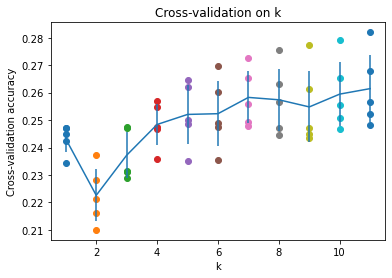

In [15]:
# plot observations--
for k in range(1,12):
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

# plot trend line with error bars--
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(range(1,12), accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()